**Objective of Project :- Using historical data and machine learning techniques, Bitcoin price prediction aims to forecast future price movements. Models analyze factors such as trading volume, sentiment, and economic indicators. These predictions assist investors, traders, and businesses in decision-making. However, caution is needed due to market volatility and external influences. Machine learning provides valuable insights but should be used alongside other tools for analysis and decision-making.**

**Steps Involved**

1. Importing Libraries
2. Loading Data
3. Reading data
4. Visualization & Analysis
5. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Loading Data**

In [3]:
df = pd.read_csv('bitcoin.csv')

**Reading Data** 

In [4]:
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [5]:
df.tail()

,Date,Price
362,5/19/2020,9729.038086
363,5/20/2020,9522.981445
364,5/21/2020,9081.761719
365,5/22/2020,9182.577148
366,5/23/2020,9180.045898


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    367 non-null    object 
 1   Price   367 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,Price
count,367.000000
mean,8810.429461
std,1486.188684
min,4970.788086
25%,7661.308594
50%,8757.788086
75%,9867.711426
max,13016.231450


In [8]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [9]:
df.dtypes

Date      object
Price    float64
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.sort_values(by='Date', inplace=True)

In [12]:
df.head()

,Date,Price
0,2019-05-23,7881.846680
1,2019-05-24,7987.371582
2,2019-05-25,8052.543945
3,2019-05-26,8673.215820
4,2019-05-27,8805.778320


In [13]:
df.tail()

,Date,Price
362,2020-05-19,9729.038086
363,2020-05-20,9522.981445
364,2020-05-21,9081.761719
365,2020-05-22,9182.577148
366,2020-05-23,9180.045898


**Visualization & Analysis**

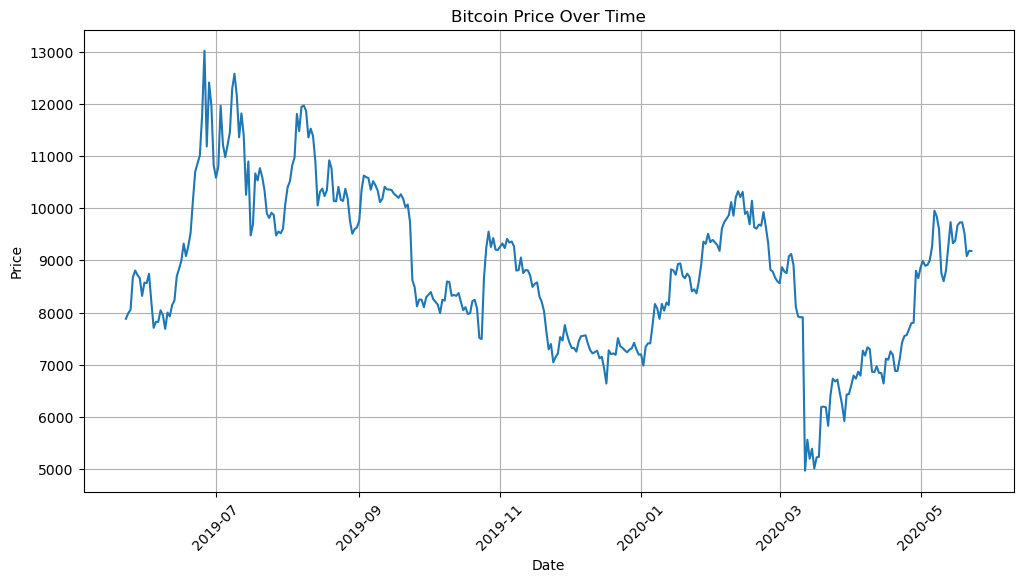

In [17]:

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()


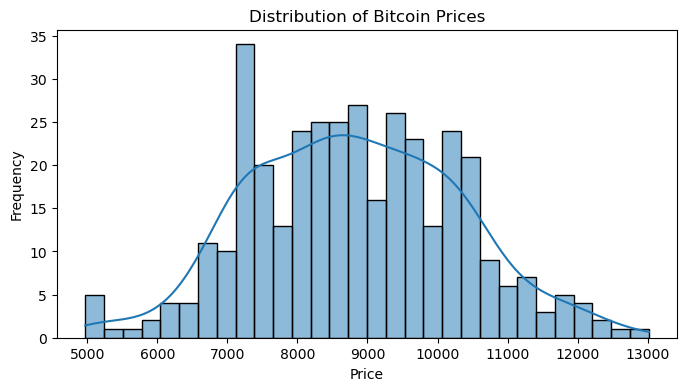

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

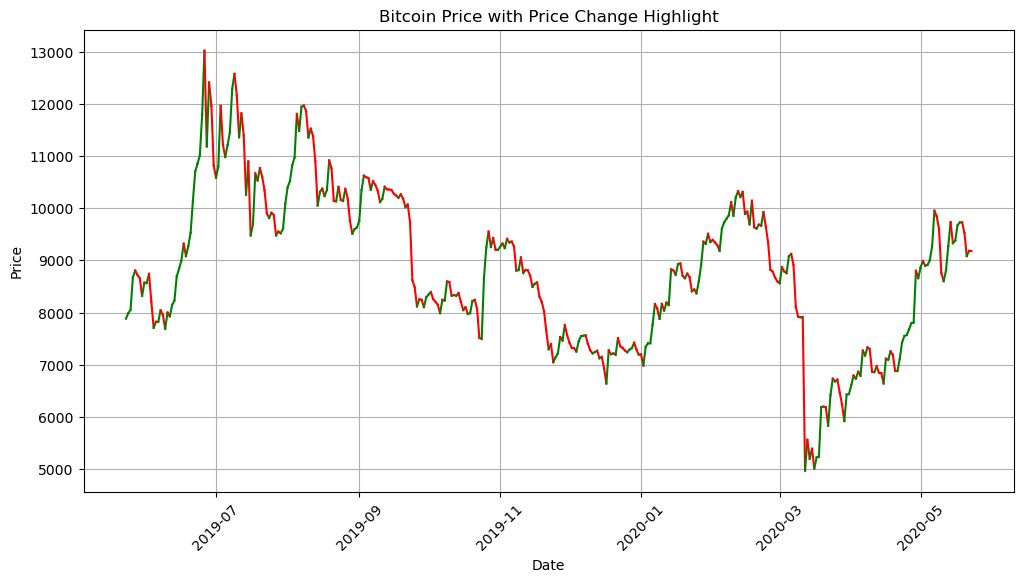

In [25]:
plt.figure(figsize=(12, 6))

colors = ['r' if df['Price'].iloc[i] < df['Price'].iloc[i - 1] else 'g' for i in range(1, len(df))]

for i in range(1, len(df)):
    plt.plot([df['Date'].iloc[i - 1], df['Date'].iloc[i]], [df['Price'].iloc[i - 1], df['Price'].iloc[i]], color=colors[i - 1])

plt.title('Bitcoin Price with Price Change Highlight')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [26]:
X = df[['Date']]  
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (293, 1) (293,)
Testing set shape (X, y): (74, 1) (74,)


In [30]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [31]:
df = df[['Date', 'Price']]

In [32]:
scaler = MinMaxScaler()
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

In [33]:
sequence_length = 30

Epoch 1/10
9/9 [==============================] - 14s 45ms/step - loss: 0.0818
Epoch 2/10
9/9 [==============================] - 0s 51ms/step - loss: 0.0218
Epoch 3/10
9/9 [==============================] - 1s 100ms/step - loss: 0.0171
Epoch 4/10
9/9 [==============================] - 0s 54ms/step - loss: 0.0139
Epoch 5/10
9/9 [==============================] - 0s 49ms/step - loss: 0.0126
Epoch 6/10
9/9 [==============================] - 1s 65ms/step - loss: 0.0110
Epoch 7/10
9/9 [==============================] - 1s 69ms/step - loss: 0.0108
Epoch 8/10
9/9 [==============================] - 1s 72ms/step - loss: 0.0102
Epoch 9/10
9/9 [==============================] - 1s 69ms/step - loss: 0.0097
Epoch 10/10
3/3 [==============================] - 3s 15ms/step
Mean Absolute Error (MAE): 413.92584592279405


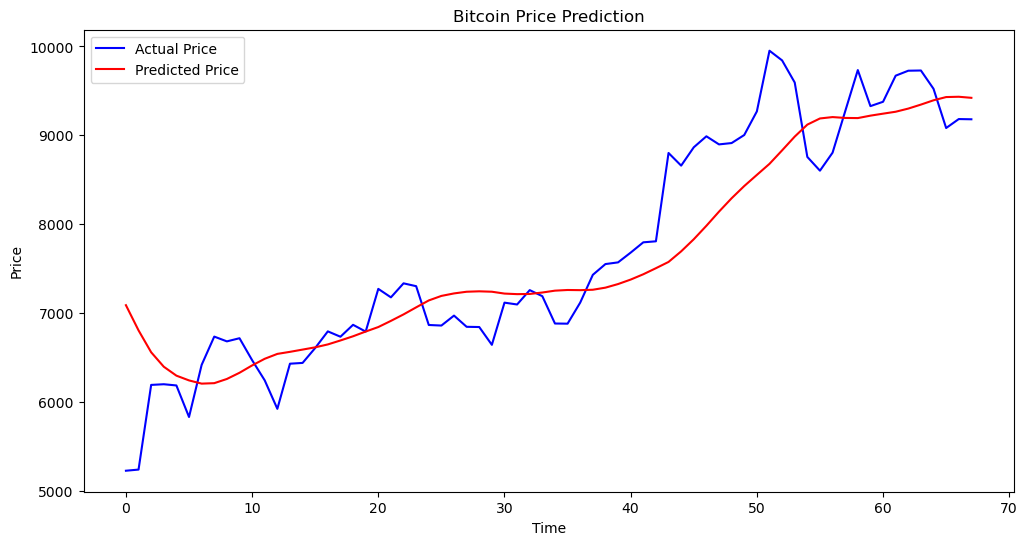

In [35]:
X = []
y = []

for i in range(len(df) - sequence_length):
    X.append(df['Price'].values[i:i + sequence_length])
    y.append(df['Price'].values[i + sequence_length])

X = np.array(X)
y = np.array(y)

split_ratio = 0.8  
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


## Conclusion

In our Bitcoin price prediction project, we utilized historical data and machine learning techniques, including LSTM modeling. We began by importing libraries, exploring and preprocessing the dataset, and engineering features. Our LSTM model effectively captured price trends, with hyperparameter tuning enhancing accuracy. Results showed the model's predictive ability, and we identified insightful patterns. While our predictions offer value to Bitcoin market participants, they should be used cautiously due to market volatility. Future work may involve model refinement, real-time data integration, and exploring alternative algorithms. In summary, our project provides valuable insights into Bitcoin price forecasting, but it's essential to combine these with thorough market analysis.
